In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
training_filepath = 'Data/dengue_features_train.csv'
training_cases_filepath = 'Data/dengue_labels_train.csv'
testing_filepath = 'Data/dengue_features_test.csv'

In [15]:
train = pd.read_csv(training_filepath, index_col=['city', 'year', 'weekofyear'])
cases = pd.read_csv(training_cases_filepath, index_col=['city', 'year', 'weekofyear'])
test = pd.read_csv(testing_filepath)

In [50]:
train.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [89]:
train.loc[('sj')]['precipitation_amt_mm'].head(40)

year  weekofyear
1990  18             12.42
      19             22.82
      20             34.54
      21             15.36
      22              7.52
      23              9.58
      24              3.48
      25            151.12
      26             19.32
      27             14.41
      28             22.27
      29             59.17
      30             16.48
      31             32.66
      32             28.80
      33             90.75
      34             32.40
      35             40.94
      36             28.86
      37             64.56
      38            143.73
      39             51.39
      40             31.18
      41             51.42
      42            143.55
      43            127.03
      44            101.35
      45             20.46
      46             20.00
      47             20.04
      48             33.61
      49              9.96
      50              0.00
      51             52.45
      52              0.00
1991  1               0.00
      2    

In [49]:
cases.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [51]:
train.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [19]:
train.columns

Index(['week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [20]:
cases.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [54]:
sj_1990 = train.loc[('sj', 1990)]
cases_sj_1990 = cases.loc[('sj', 1990)]

/home/v1b3m/DataScience/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/home/v1b3m/DataScience/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [64]:
first_20_weeks_sj_1990 = sj_1990.head(n=20)
first_20_weeks_cases_sj_1990 = cases_sj_1990.head(n=20)

In [65]:
first_20_weeks_sj_1990

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,,,,,,,,,,,,,,,,,,,,,
18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1


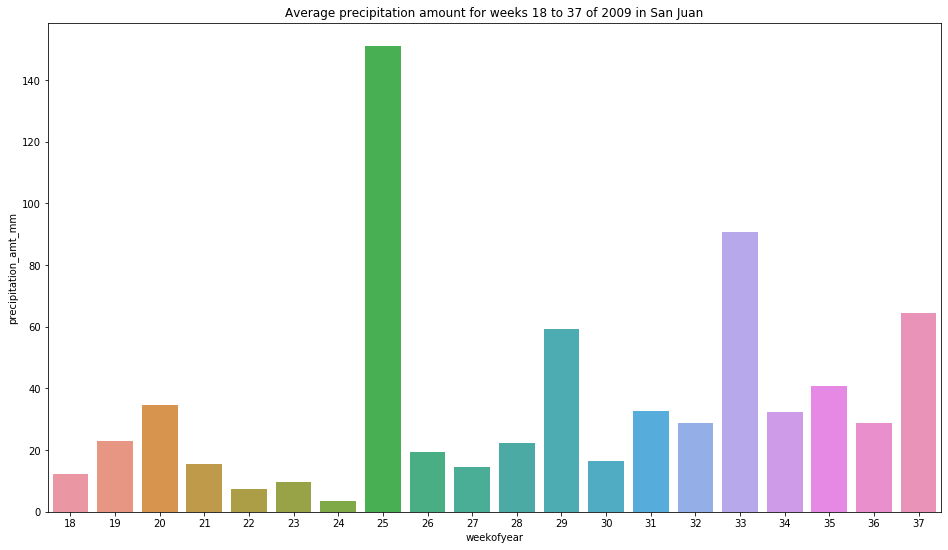

In [80]:
# Bar chart showing average score for racing games by platform
plt.figure(figsize=(16, 9)) # Your code here
plt.title("Average precipitation amount for weeks 18 to 37 of 2009 in San Juan")

sns.barplot(y=first_20_weeks_sj_1990['precipitation_amt_mm'], x=first_20_weeks_sj_1990.index)


Text(0, 0.5, 'Recorded cases')

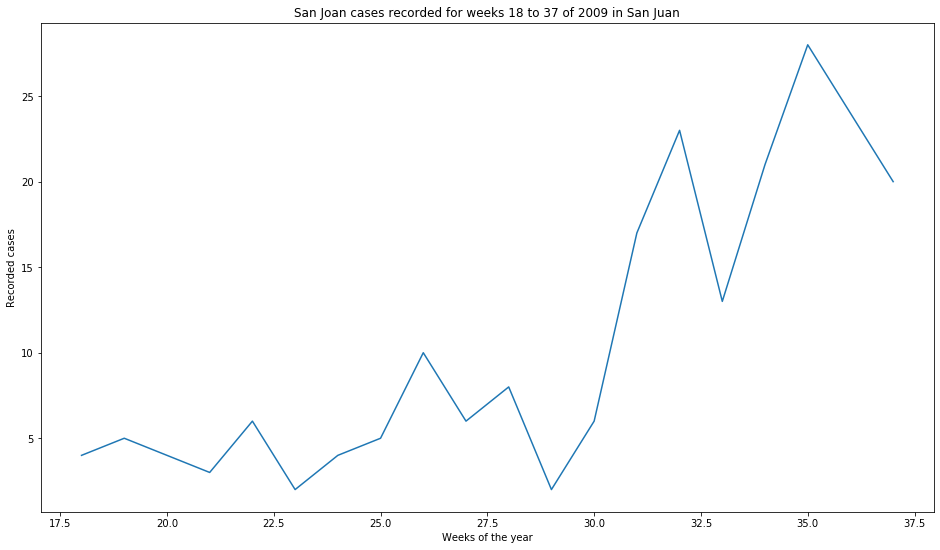

In [77]:
plt.figure(figsize=(16, 9))
plt.title("San Joan cases recorded for weeks 18 to 37 of 2009 in San Juan")
sns.lineplot(data=first_20_weeks_cases_sj_1990['total_cases'])
plt.xlabel("Weeks of the year")
plt.ylabel("Recorded cases")


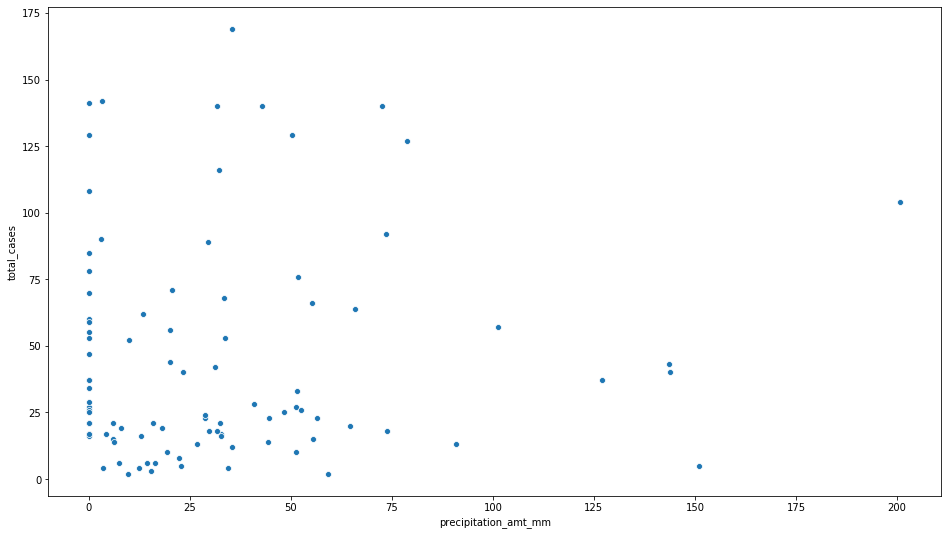

In [93]:
# Scatter plot showing the relationship between 'Average precipitation' and 'recorded cases'
# for weeeks 18 to 37 of 2009 in San Juan
plt.figure(figsize=(16, 9))
sns.scatterplot(x=train.loc[('sj')]['precipitation_amt_mm'].head(100), y=cases.loc[('sj')]['total_cases'].head(100))

In [ ]:
sns.scatterplot(x=sj_1990.head(100)['precipitation_amt_mm'], y=cases)

In [84]:
sj_1990['precipitation_amt_mm']

weekofyear
18     12.42
19     22.82
20     34.54
21     15.36
22      7.52
23      9.58
24      3.48
25    151.12
26     19.32
27     14.41
28     22.27
29     59.17
30     16.48
31     32.66
32     28.80
33     90.75
34     32.40
35     40.94
36     28.86
37     64.56
38    143.73
39     51.39
40     31.18
41     51.42
42    143.55
43    127.03
44    101.35
45     20.46
46     20.00
47     20.04
48     33.61
49      9.96
50      0.00
51     52.45
52      0.00
Name: precipitation_amt_mm, dtype: float64